# Import packages

In [5]:

# basic library
from satpy.scene import Scene
from datetime import datetime
import numpy as np
import xarray as xr
import os
import glob
import pickle
import gc

import sys  # print(sys.path)
sys.path.append(
    '/Users/gao/OneDrive - whu.edu.cn/ETH/Courses/4. Semester/DEoAI')
sys.path.append('/project/pr94/qgao/DEoAI')
sys.path.append('/scratch/snx3000/qgao')


# plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mpcolors
from matplotlib.legend import Legend
from matplotlib.patches import Rectangle
import matplotlib.ticker as mticker
from matplotlib import font_manager as fm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import BoundaryNorm
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.animation as animation

fontprop_tnr = fm.FontProperties(
    fname='/project/pr94/qgao/DEoAI/data_source/TimesNewRoman.ttf')
# mpl.rcParams['font.family'] = fontprop_tnr.get_name()
mpl.rcParams['figure.dpi'] = 600
mpl.rc('font', family='Times New Roman', size=10)
mpl.rcParams['backend'] = 'Qt4Agg'  #
# mpl.get_backend()

plt.rcParams.update({"mathtext.fontset": "stix"})
plt.rcParams["font.serif"] = ["Times New Roman"]

import cartopy as ctp
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from DEoAI_analysis.module.mapplot import (
    ticks_labels,
    scale_bar,
    framework_plot,
)


# data analysis
import pandas as pd
import xesmf as xe
import metpy.calc as mpcalc
from metpy.interpolate import cross_section
from metpy.units import units
from haversine import haversine
from scipy import interpolate
import dask
dask.config.set({"array.slicing.split_large_chunks": False})
import rasterio as rio

from DEoAI_analysis.module.namelist import (
    month,
    seasons,
    months,
    years,
    years_months,
    timing,
    quantiles,
    folder_1km,
    g,
    m,
    r0,
    cp,
    r,
    r_v,
    p0sl,
    t0sl,
    extent1km,
    extent3d_m,
    extent3d_g,
    extent3d_t,
    extentm,
    extentc,
    extent12km,
    extent1km_lb,
    ticklabel1km,
    ticklabelm,
    ticklabelc,
    ticklabel12km,
    ticklabel1km_lb,
    transform,
    coastline,
    borders,
)

from DEoAI_analysis.module.statistics_calculate import(
    get_statistics
)

from DEoAI_analysis.module.spatial_analysis import(
    rotate_wind
)

# Import data

In [6]:

from satpy import available_readers
# available_readers()
from satpy import Scene
from glob import glob

filenames = glob(
    "/project/pr94/qgao/DEoAI/data_source/eumetsat/1447992-1of1/MSG2-SEVI-MSG15-0100-NA-20100804001241.859000000Z-20100804001253-1448136.nat")
global_scene = Scene(reader="seviri_l1b_native", filenames=filenames)


# Check data

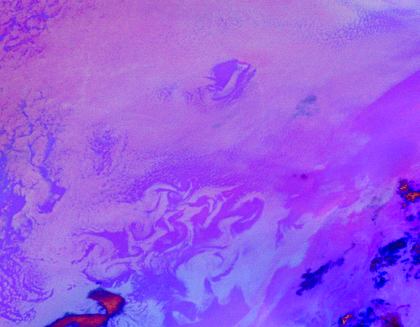

In [7]:
# global_scene.load(["VIS006", "VIS008", "IR_108"], upper_right_corner='NE')
# global_scene.available_dataset_names()
global_scene.available_composite_names()
global_scene.load(['night_microphysics'], upper_right_corner='NE')
global_scene.show('night_microphysics')

# crs = global_scene['VIS006'].attrs['area'].to_cartopy_crs()
# crs.bounds
# vis006_lon, vis006_lat = global_scene["VIS006"].attrs['area'].get_lonlats()
# global_scene['natural_color']


# local_scene = global_scene.resample()
# local_scene.load(['hrv_clouds'])
# local_scene.show('hrv_clouds')

# global_scene.load(['natural_color_with_night_ir'], upper_right_corner='NE')
# global_scene.show('natural_color_with_night_ir')

# map plot

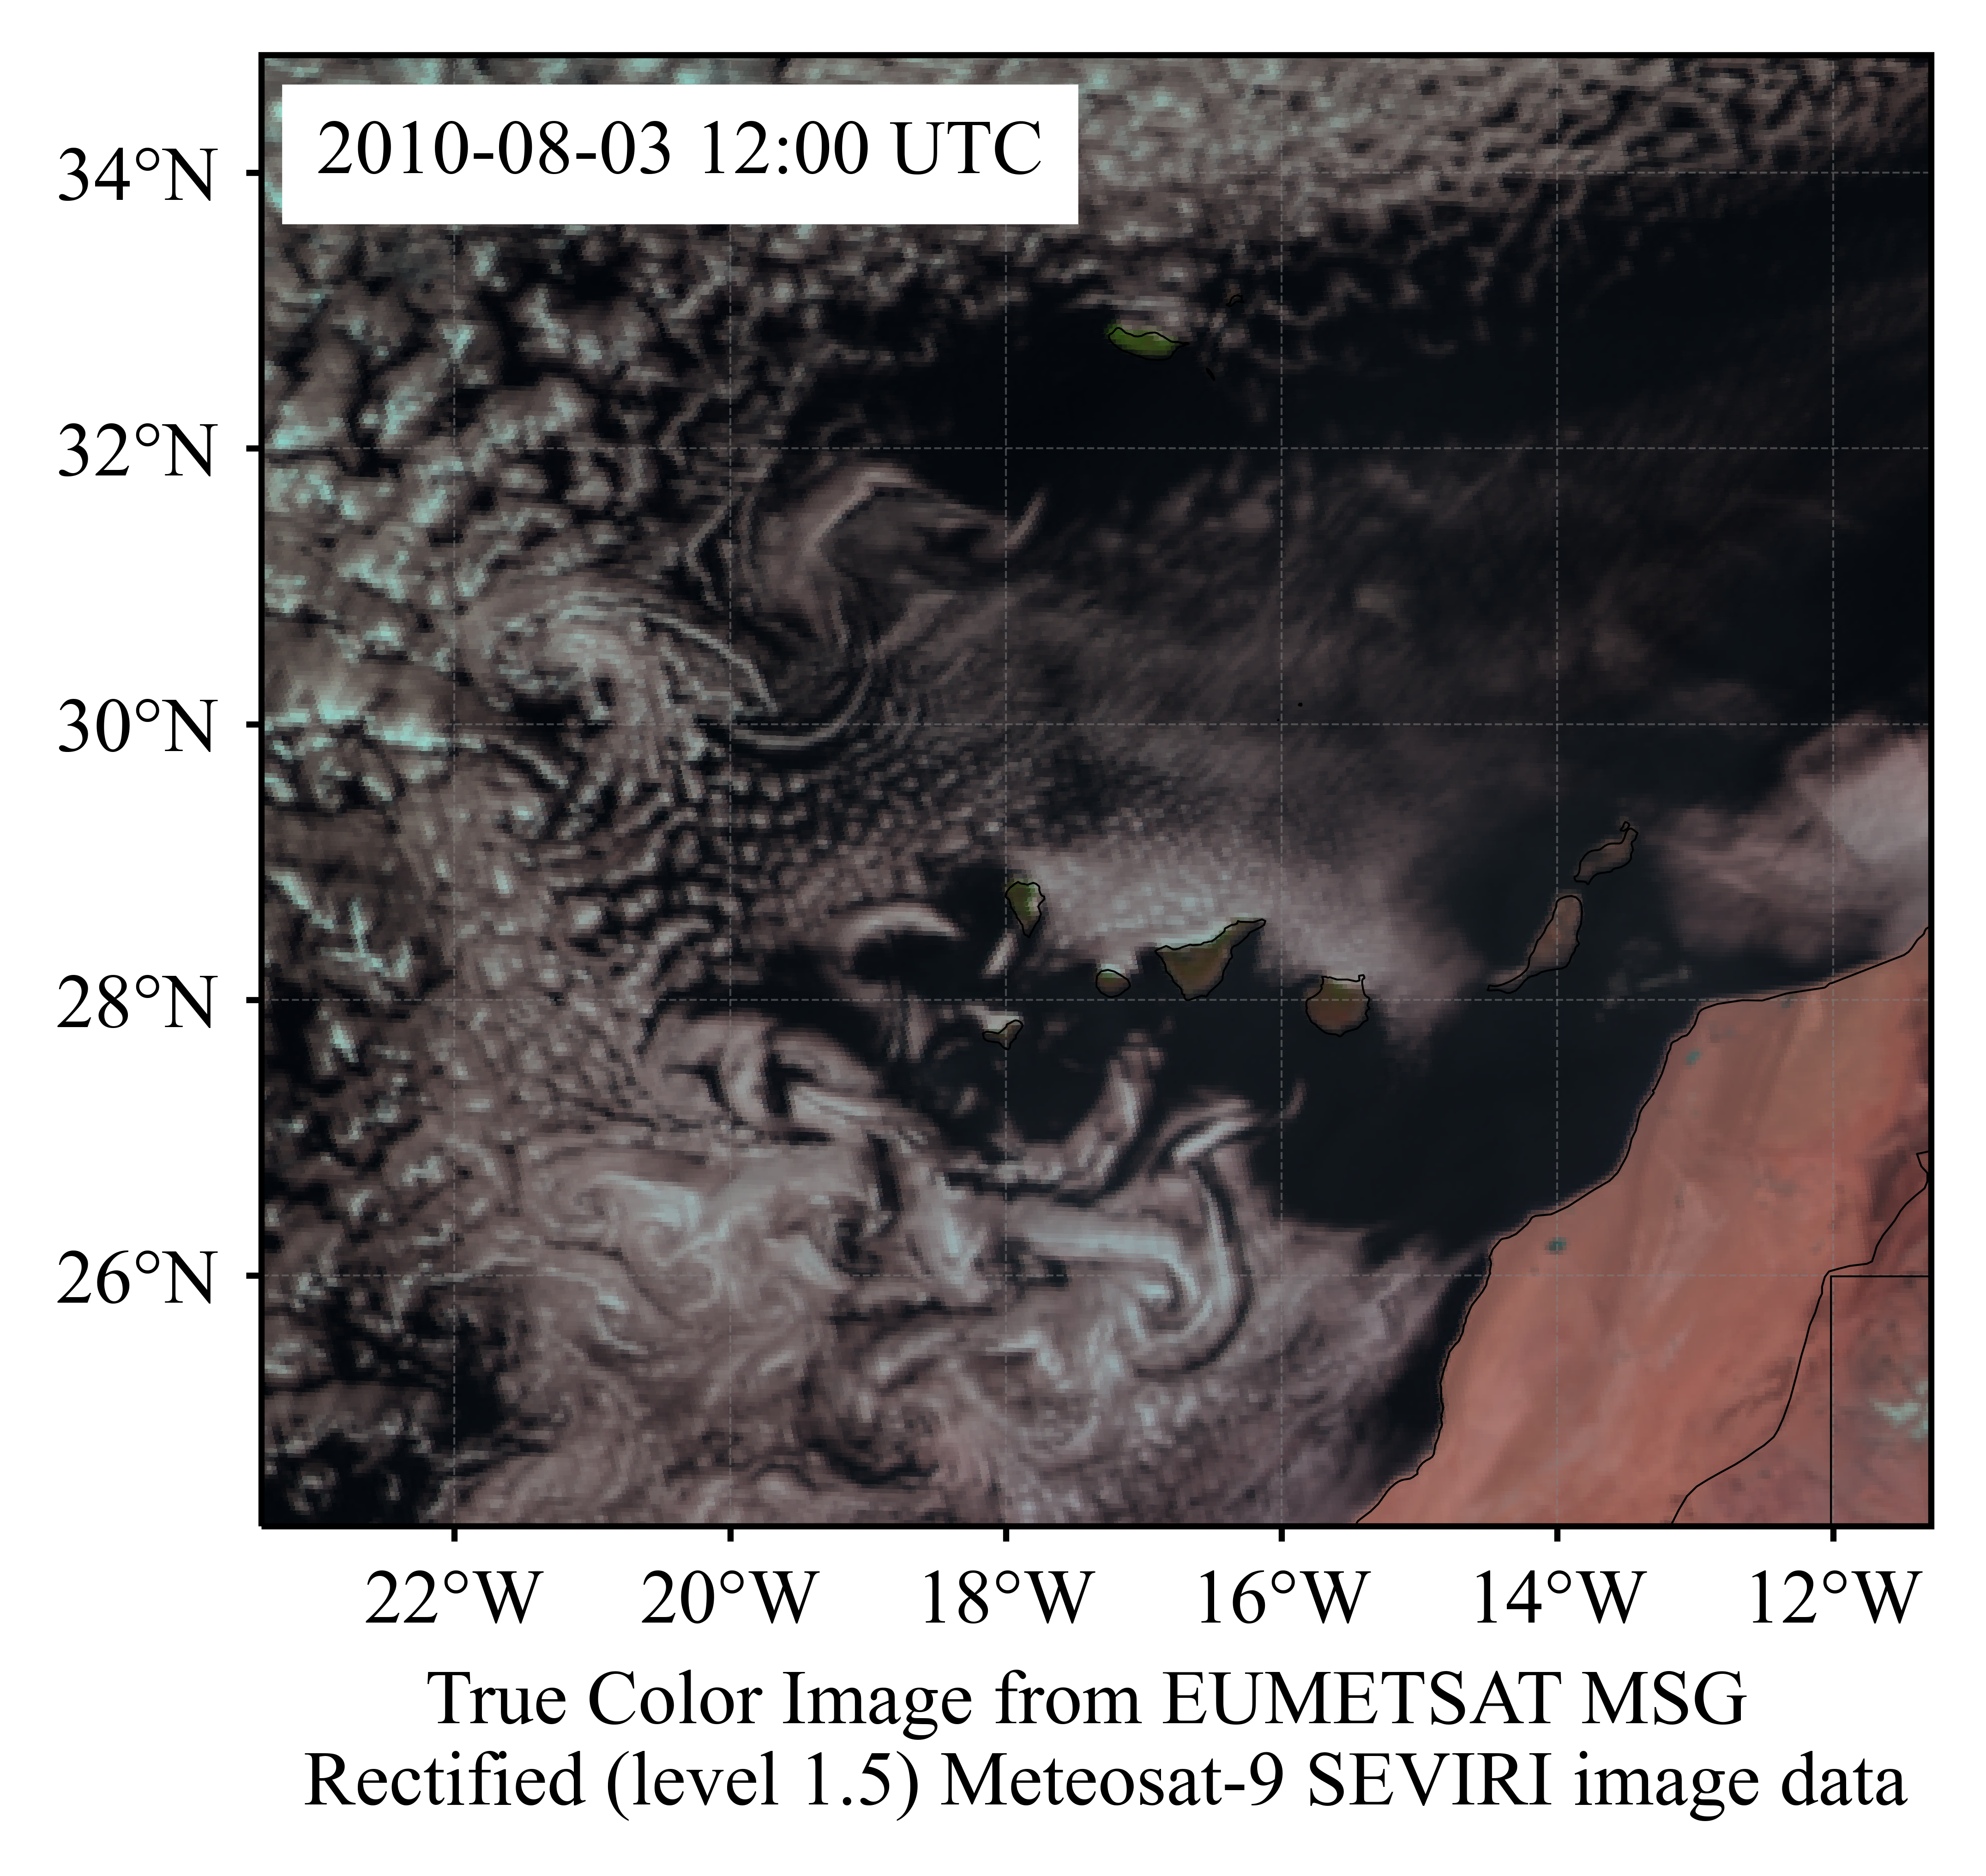

In [19]:
fig, ax = framework_plot(
    "1km_lb", figsize=np.array([8.8, 8.8]) / 2.54, border_color = 'white', grid_color = 'white',
)
color_tuples = np.array(
    [global_scene['natural_color'][0, :, :].values.flatten(),
    global_scene['natural_color'][1, :, :].values.flatten(),
    global_scene['natural_color'][2, :, :].values.flatten()]).transpose()

gamma = 2.2
color_tuples = np.power(color_tuples / 100, 1/gamma)

im = ax.pcolormesh(vis006_lon, vis006_lat,
                   np.zeros_like(vis006_lon),
                   color=color_tuples,
                   transform=transform, rasterized=True,
                   shading='auto'
                   )
ax.text(-23, 34, str(global_scene.start_time)[0:16] + ' UTC', backgroundcolor='white')


ax.set_xlabel('True Color Image from EUMETSAT MSG \n Rectified (level 1.5) Meteosat-9 SEVIRI image data')

fig.subplots_adjust(left=0.12, right=0.99, bottom=0.15, top=0.99)
# fig.show()
fig.savefig('/project/pr94/qgao/DEoAI/figures/00_test/trial.png', dpi=1200)
